In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("files/BAJFINANCE.csv")

In [3]:
df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [5]:
df.set_index('Date', inplace =True)

In [6]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

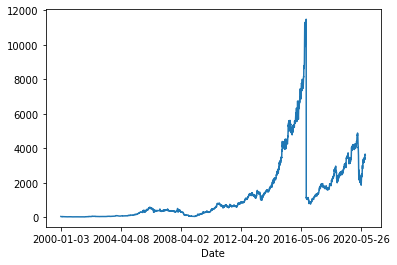

In [7]:
df['VWAP'].plot()

In [8]:
df.shape

(5070, 14)

In [9]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [12]:
df.dropna(inplace=True)

In [14]:
data=df.copy()


In [15]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [16]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [21]:
lag_features=['High', 'Low','Volume', 'Turnover', 'Trades']
window1=3
window2=7

In [22]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [23]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [24]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [25]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [26]:
ind_features =['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [27]:
training_data=data[0:1000]
test_data = data[1000:]

In [28]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-05,BAJFINANCE,EQ,4352.25,4370.00,4495.00,4300.00,4450.05,4450.65,4433.00,32940,...,70.884860,78.761458,66.809586,79.697757,7876.964665,79421.304142,3.582569e+12,3.389999e+13,521.003199,7485.326166
2015-06-08,BAJFINANCE,EQ,4450.65,4509.80,4509.80,4405.10,4446.00,4472.70,4457.66,24255,...,71.054064,79.786689,98.500419,93.363860,7875.863953,79100.851270,3.584564e+12,3.375028e+13,531.338875,7383.102032
2015-06-09,BAJFINANCE,EQ,4472.70,4411.50,4619.00,4400.10,4540.00,4582.35,4507.52,56110,...,67.724540,88.452094,59.288869,91.091487,16467.235904,12881.335797,7.508779e+12,5.900809e+12,1855.588945,1427.734269


In [51]:
training_data.dropna(inplace=True)

<ipython-input-51-4f08539ba747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(inplace=True)


In [52]:
training_data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        0
Highrolling_mean_7        0
Lowrolling_mean_3         0
Lowrolling_mean_7         0
Volumerolling_mean_3      0
Volumerolling_mean_7      0
Turnoverrolling_mean_3    0
Turnoverrolling_mean_7    0
Tradesrolling_mean_3      0
Tradesrolling_mean_7      0
Highrolling_std_3         0
Highrolling_std_7         0
Lowrolling_std_3          0
Lowrolling_std_7          0
Volumerolling_std_3       0
Volumerolling_std_7       0
Turnoverrolling_std_3     0
Turnoverrolling_std_7     0
Tradesrolling_std_3       0
Tradesrolling_std_7       0
dtype: int64

In [29]:
!pip install pmdarima

You should consider upgrading via the 'C:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [30]:
from pmdarima import auto_arima

In [53]:
training_data[ind_features].isna().sum()

Highrolling_mean_3        0
Highrolling_mean_7        0
Lowrolling_mean_3         0
Lowrolling_mean_7         0
Volumerolling_mean_3      0
Volumerolling_mean_7      0
Turnoverrolling_mean_3    0
Turnoverrolling_mean_7    0
Tradesrolling_mean_3      0
Tradesrolling_mean_7      0
Highrolling_std_3         0
Highrolling_std_7         0
Lowrolling_std_3          0
Lowrolling_std_7          0
Volumerolling_std_3       0
Volumerolling_std_7       0
Turnoverrolling_std_3     0
Turnoverrolling_std_7     0
Tradesrolling_std_3       0
Tradesrolling_std_7       0
dtype: int64

AttributeError: 'function' object has no attribute 'isna'

In [47]:
real_train.isna().sum()

AttributeError: 'function' object has no attribute 'isna'

In [54]:
model = auto_arima(y=training_data['VWAP'], exogenous=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=9052.149, Time=5.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9346.579, Time=2.51 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9219.992, Time=3.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9105.951, Time=2.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15211.988, Time=2.74 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=9078.388, Time=4.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=9052.009, Time=3.79 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9104.191, Time=3.33 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=9051.597, Time=3.80 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=9052.311, Time=4.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=9053.533, Time=4.59 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9049.692, Time=3.36 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9218.021, Time=2.54 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9050.397, Time=4.15 sec
 ARIMA(2,0,1)(0,0,0)[0]         

In [55]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [57]:
forecast = model.predict(n_periods = len(test_data), exogenous=test_data[ind_features])

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [60]:
test_data['Forecast_ARIMA']=forecast

<ipython-input-60-5aacccf561f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Forecast_ARIMA']=forecast


<AxesSubplot:xlabel='Date'>

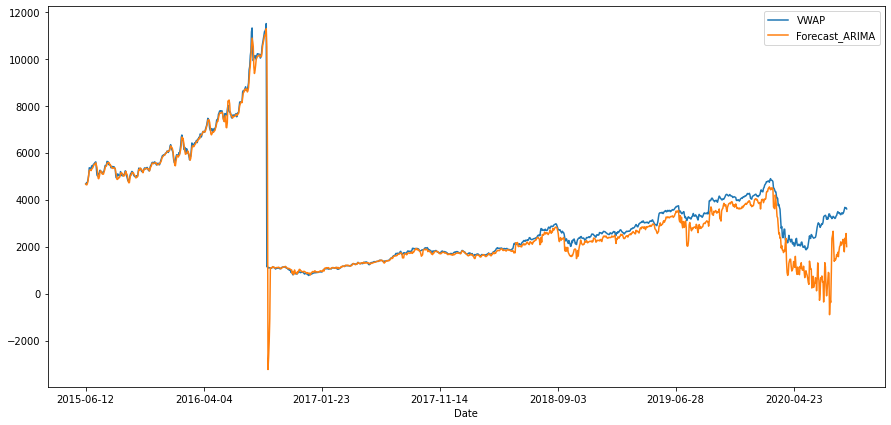

In [62]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(15,7))

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [64]:
np.sqrt(mean_squared_error(test_data['VWAP'], test_data['Forecast_ARIMA']))

670.4826932094458

In [65]:
mean_absolute_error(test_data['VWAP'], test_data['Forecast_ARIMA'])

309.18118049101884